<h1> Regression </h1>

#### структура
- Введение - зачем нужна регрессия
- Постановка задачи
- Линейная регрессия пример решения
- Вспомним про нормальное распределение. Его свойства. Цпт.
- Линейная регрессия - вывод через правдоподобие
- Линейная регрессия с нелинейными базисными функциями
- Переобучение. Регуляризация.
- Вероятностный взгляд на регуляризацию


Что почитать

https://habr.com/company/ods/blog/323890/ - Базовые принципы машинного обучения на примере линейной регрессии

https://habr.com/company/ods/blog/322076/ - Линейные модели классификации и регрессии

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Для чего нужна регрессия?
- Чтобы узнать зависимость 

![](1.jpg)


- что будет с акциями завтра?
- как быстро к вам доберется курьер или такси подаст машину?
- сколько будет стоить квартира с определенной площадью и удаленностью до метро?

оптимизация добавок различных примесей в сплавы.
- сложные зависимости в химических процессах (два сплава содержат Mn) - обучим регрессию понимать все за нас.


объем добавок -> (регрессия) -> гост для каждого типа стали.

Чуток формальнее
- $X$ - матрица-описание объектов, дизайн-матрица;
- $Y$ - матрица-характеристики объектов;
- $f$ - зависимость - некоторый метод подсчета характеристик объектов основываясь на их описании;
- $\left(X, Y = f\left(X\right)\right)$ - наблюдения;
- $S = \left\{X_i, Y_i\right\}_{i=1}^N$ - обучающая выборка - набор $N$ наблюдений - пары (описание объекта - значение);
- $\hat f$ - регрессионная модель - функция которая аппроксимирует исходную зависимость $f$.

В общем случае линейная регрессия моделируется так:

$$
y_i = w_0 + w_1 * x_{i1} + ... + w_m * x_{im} + \epsilon 
$$

Где $\epsilon$ - шум, обычно предполагают $\epsilon \sim \mathcal{N}(0,\,\sigma^{2})$ - с нулевым средним.

Задача сводится к ее обучению (поиску коэффициентов) для некоторой метрики.

##### 1. Инженеристое решение

In [2]:
np.random.seed(1132)

X = np.random.rand(60) * 30
y = X * 3 + 6 + np.random.normal(scale=10, size=X.shape)

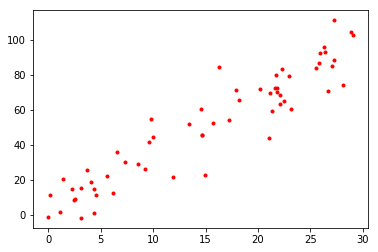

In [3]:
plt.plot(X, y, 'r.')

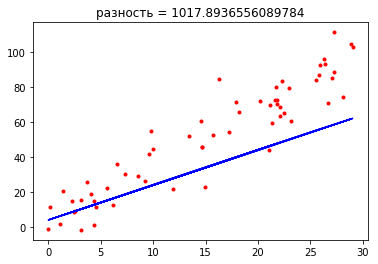

In [4]:
plt.plot(X, y, 'r.')
y_hat = X * 2 + 4
plt.plot(X, y_hat, 'b-')
plt.title('разность = {}'.format(np.sqrt(np.sum(y_hat - y)**2)));

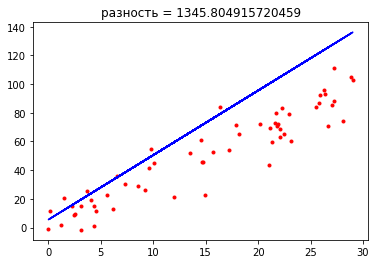

In [5]:
plt.plot(X, y, 'r.')
y_hat = X * 4.5 + 5.5
plt.plot(X, y_hat, 'b-')
plt.title('разность = {}'.format(np.sqrt(np.sum(y_hat - y)**2)));

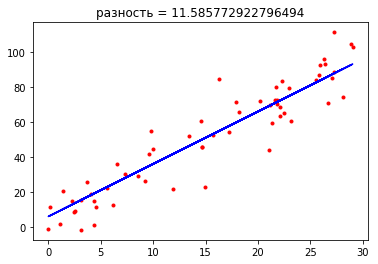

In [6]:
plt.plot(X, y, 'r.')
y_hat = X * 3 + 6
plt.plot(X, y_hat, 'b-')
plt.title('разность = {}'.format(np.sqrt(np.sum(y_hat - y)**2)));

##### Как выбрать оптимальзую прямую при условии, что в жизни точки не лежат на одной прямой из-за (например) погрешности изменений или неучтенных факторов ?

$$
ERROR(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i)\ \right)
$$

$$
ERROR(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i)\ \right) ^ 2
$$

$$
ERROR(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left|\ y_i - \hat{f}(x_i)\ \right|
$$

$$
ERROR(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left|\ \log(y_i) - \log(\hat{f}(x_i))\ \right|
$$

$$
y_i = w_0 + w_1 * x_{i1} + ... + w_m * x_{im} + \epsilon 
$$

Чтобы обучать регрессионные модели нужно определиться с тем как измерять качество предсказаний.

Обозначим за $\hat{f}$ - прогноз модели, за y - истинные ответы, за $L(y,\hat{f})$ - отклонение прогноза a от истинного ответа y.

Основной способ измерить отклонение - посчитать квадрат отклонений

$$
L(y,\hat{f}) = (y - \hat{f}) ^ 2
$$

Квадрат отклонения - дифференцируемая выпуклая функция. Наиболее часто встречается в задачах регрессии.

- Основанный на ней функционал называется MSE (Mean Squared Error)

$$
MSE(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i)\ \right) ^ 2
$$


- MAE (Mean Absolute Error)

$$
MAE(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left|\ y_i - \hat{f}(x_i)\ \right|
$$


- $R^2$ - коэффициент детерминации, показывает долю объясненной дисперсии (т.е. доля дисперсии объясненная моделью) в общей дисперсии целевой переменной. Данный коэффициент принимает значение от 0 до 1 (чем ближе к 1, тем лучше модель объясняет данные)

(https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8)

$$
R^2(\hat{f}, x) = 1 - \frac{\sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i)\ \right) ^ 2}{\sum_{i=1}^{N}\left(\ y_i - \bar{y}\ \right) ^ 2} 
$$

$\bar{y} = \frac{1}{N}\sum_{i=1}^{N} y_i$ 

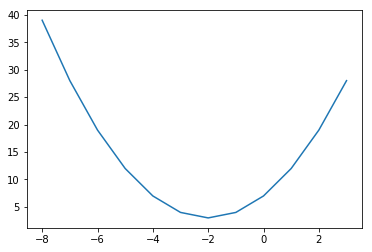

In [7]:
# - как найти минимум фукнции f(x) ?

def f(x):
    return (x + 2) ** 2 + 3

plt.plot(range(-8, 4), [f(i) for i in range(-8, 4)])

##### Нормальное распределение

Рост человека, вес человека, отклонение при стрельбе от центра мишени, итд

In [1]:
!head ./weight-height.csv
# https://www.kaggle.com/mustafaali96/weight-height

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


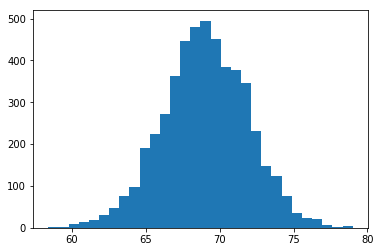

In [25]:
plt.hist(df.loc[df.Gender=='Male', 'Height'].values, bins=30);

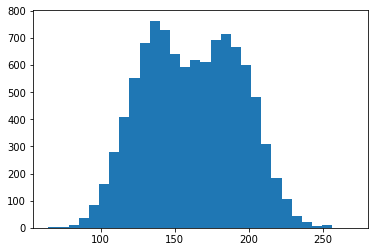

In [26]:
plt.hist(df.loc[:, 'Weight'].values, bins=30);

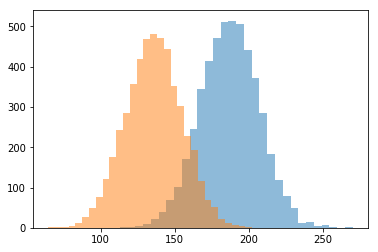

In [27]:
plt.hist(df.loc[df.Gender=='Male', 'Weight'].values, bins=30, alpha=0.5);
plt.hist(df.loc[df.Gender=='Female', 'Weight'].values, bins=30, alpha=0.5);

In [13]:
wh_dataset = df.loc[df.Gender=='Male', ['Height', 'Weight']].values

In [14]:
X = wh_dataset[:, 0]
y = wh_dataset[:, 1]

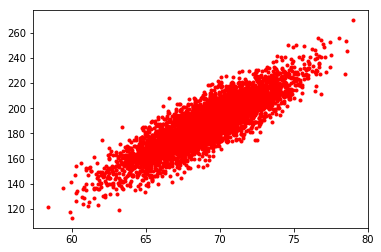

In [15]:
plt.plot(X, y, 'r.')

# Переход в многомерное нелинейное пространство

### Как сделать регрессию линейной если зависимость нелинейная?

-   $\mathbf{x}$ может зависеть не совсем линейно от $\mathbf{y}$.

-   Перейдем в новое пространство - $\phi(\mathbf{x})$ где $\phi(\cdot)$ это нелинейная функция от $\mathbf{x}$.

-   Возьмем линейную комбинацию этих нелинейных функций $$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x}).$$

-   Возьмем некотрый базис функций (например квадратичный базис)
    $$\boldsymbol{\phi} = [1, x, x^2].$$

-   Теперь наша функция имеет такой вид
    $$f(\mathbf{x}_i) = \sum_{j=1}^m w_j \phi_{i, j} (x_i).$$


# Регуляризация

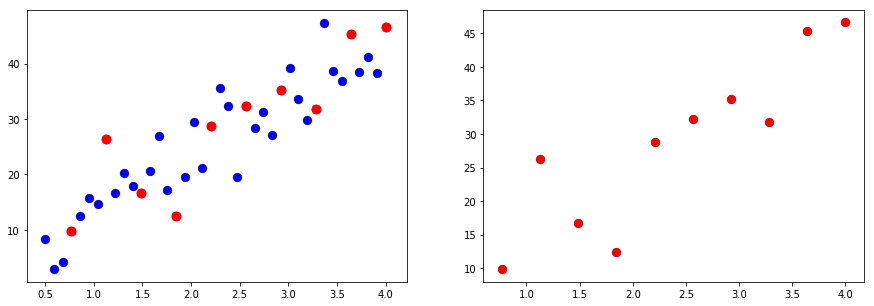

In [40]:
a = 5
b = 10
n_points = 40
x_min = 0.5
x_max = 4

x = np.linspace(x_min, x_max, n_points)[:, np.newaxis]
completely_random_number = 33
rs = np.random.RandomState(completely_random_number)
noise = rs.normal(0, 5, (n_points, 1))

y = a + b * x + noise
idx = np.arange(3,40,4)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x,y, s=80, c ='b', edgecolors='k', linewidths=0.3);
plt.scatter(x[idx],y[idx], s=80, c='r');
plt.subplot(1,2,2)
plt.scatter(x[idx],y[idx], s=80, c ='r', edgecolors='k', linewidths=0.3);

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [42]:

x_train = x[idx]
y_train = y[idx]

lr_linear = LinearRegression(fit_intercept=True)
lr_linear.fit(x_train, y_train)
y_linear = lr_linear.predict(x_train)

# Cubic 
cubic = PolynomialFeatures(degree=3)
x_cubic = cubic.fit_transform(x_train)

lr_3 = LinearRegression(fit_intercept=False)
lr_3.fit(x_cubic, y_train)
y_cubic = lr_3.predict(x_cubic)


# 9'th fit
poly = PolynomialFeatures(degree=9)
x_poly = poly.fit_transform(x_train)

lr_9 = LinearRegression(fit_intercept=False)
lr_9.fit(x_poly, y_train)
y_poly = lr_9.predict(x_poly)

In [43]:
# PREDICTION ON WHOLE DATA

# linear prediction

y_pred_linear = lr_linear.predict(x)

# cubic prediction

x_cubic_test = cubic.transform(x)
y_pred_cubic = lr_3.predict(x_cubic_test)

# poly 9 prediction

x_poly_test = poly.transform(x)
y_pred_poly = lr_9.predict(x_poly_test)

In [44]:
def simple_plot(x, y, y_regression, test_idx=None):
    plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
    plt.plot(x,y_regression);
    if test_idx is not None:
        plt.scatter(x[test_idx], y[test_idx], s=80, c ='b', edgecolors='k', linewidths=0.3);
    plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

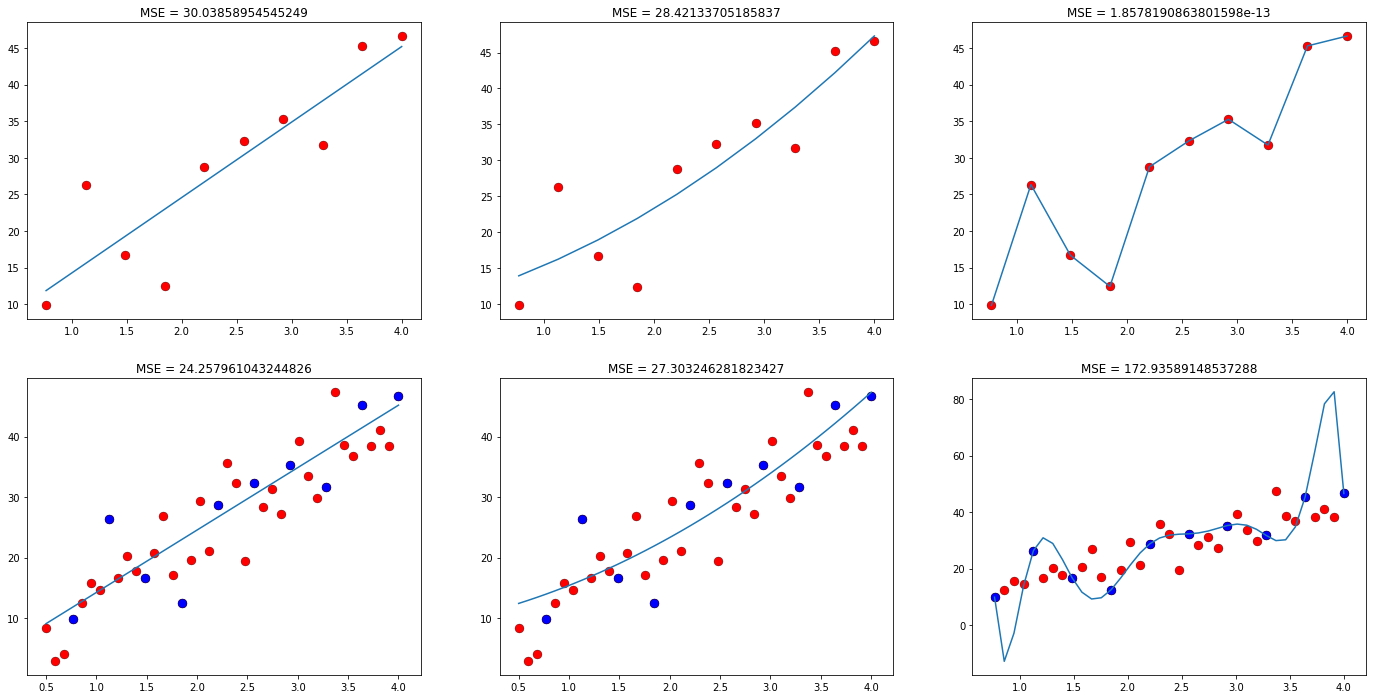

In [45]:
# PLOT PICTURES

plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
simple_plot(x_train,y_train,y_linear)
plt.subplot(2,3,2)
simple_plot(x_train,y_train,y_cubic)
plt.subplot(2,3,3)
simple_plot(x_train,y_train,y_poly)


plt.subplot(2,3,4)
simple_plot(x,y,y_pred_linear, test_idx=idx)
plt.subplot(2,3,5)
simple_plot(x,y,y_pred_cubic, test_idx=idx)
plt.subplot(2,3,6)
simple_plot(x[3:],y[3:],y_pred_poly[3:], test_idx=idx-3)


# FIRST ROW is TEST data set, SECOD ROW is WHOLE data

> Переобучаемся под обучающую выборку - слишком "хорошая модель" которая может ловить мега-нелинейные зависимости, которых на самом деле нет.


>> Большие коэффициенты делают возможным сильное изменение величины при небольшом изменении признаков.


##### Подход 0.

- Упростить модель.
- Добавить больше данных в обучающую выборку

##### Подход 1.

- Давайте запретим нашим коэффициентам быть большими!

$$
Q_{reg}(\hat{f}, x) = Q(\hat{f}, x) + \alpha * R(w) \to min
\\
$$


Можно просто добавить некоторый функционал который будет зависеть от весов регрессии

$$
MSE(\hat{f}, x) = \left|\left| \ y - X w\ \right|\right|^2_2 + a \left|\left| w \right|\right|^2_2 \ \to min
$$

https://ru.wikipedia.org/wiki/Норма_(математика)



Выражение 

$$
\sum_{i=0}^{N}\left(y_i - (w_2 * x_i ^ 2 + w_1 * x_i + w_0) \right) ^ 2 + \alpha \sum_{j=1}^{2}\left(w_i\right)^2 \to min
$$

эквивалентно в случае выпуклого функционала MSE

Почему можно увидеть тут :(https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0)
и тут
(https://ru.wikipedia.org/wiki/%D0%A3%D1%81%D0%BB%D0%BE%D0%B2%D0%B8%D1%8F_%D0%9A%D0%B0%D1%80%D1%83%D1%88%D0%B0_%E2%80%94_%D0%9A%D1%83%D0%BD%D0%B0_%E2%80%94_%D0%A2%D0%B0%D0%BA%D0%BA%D0%B5%D1%80%D0%B0)

$$
\begin{cases}
\sum_{i=0}^{N}\left(y_i - (w_2 * x_i ^ 2 + w_1 * x_i + w_0) \right) ^ 2 \to min
\\
\\
\sum_{j=1}^{2}\left(w_i\right)^2 \leq C
\\
\end{cases}
$$


То есть мы хотим минимизировать наш функционал MSE, но при этом сделать это так, чтобы у нас веса регрессии были как можно меньше. (Почему мы не занижаем $w_0$ ?
(Если у нас нет информации что свободная переменная должна быть близкой к нулю то смысла нет.))

Такой вид регрессии называется Ridge Regression - гребневая.

Почему гребневая?

$$
\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X} + \alpha E \right)^{-1} \mathbf{X}^\top \mathbf{y} 
$$

Либо в качестве слагаемого отвечающего за регуляризацию можно добавить сумму модулей значений весов и минимизировать их.

$$
MSE(\hat{f}, x) = \left|\left| \ y - X w\ \right|\right|^2_2 + \left|\left| w \right|\right|_1 \ \to min
$$

$$
\sum_{i=0}^{N}\left(y_i - (w_2 * x_i ^ 2 + w_1 * x_i + w_0) \right) ^ 2 + \alpha \sum_{j=1}^{2}\left|w_i\right| \to min
$$

$$
\begin{cases}
\sum_{i=0}^{N}\left(y_i - (w_2 * x_i ^ 2 + w_1 * x_i + w_0) \right) ^ 2 \to min
\\
\\
\sum_{j=1}^{2}\left|w_i\right | \leq C
\\
\end{cases}
$$


Такая регрессия называется Lasso Regression

![](regularization.png)

кажется рисунок из книжки 
https://web.stanford.edu/~hastie/ElemStatLearn/

1) мы смещаем наши оптимальные оценки на веса регрессии (w или betta  в зависимости от обозначения) - ближе к нулю.
т.е. задаем априорные знания о весах в модель - говорим ей что веса должны быть ближе к нулю.

2) видно что модуль в большинстве случаем жестко зануляет веса некоторых признаков в отличие от квадрата - таким образом происходит отбор более значимых признаков - т.е. признаки с небольшими весами - не очень интересны.

3) что еще можно сказать про регуляризацию ?